### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [8]:
# Concatenar todas las tiendas en un solo DataFrame
all_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular facturación total
facturacion_total = all_tiendas['Precio'].sum()
print(f"Facturación total: ${facturacion_total:,.2f} COP")

# Calcular facturación por tienda
facturacion_por_tienda = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}
print("\nFacturación por tienda:")
for tienda_n, facturacion in facturacion_por_tienda.items():
    print(f"{tienda_n}: ${facturacion:,.2f} COP")

Facturación total: $4,403,619,200.00 COP

Facturación por tienda:
Tienda 1: $1,150,880,400.00 COP
Tienda 2: $1,116,343,500.00 COP
Tienda 3: $1,098,019,600.00 COP
Tienda 4: $1,038,375,700.00 COP


# 2. Ventas por categoría

Ventas totales por categoría:
Categoría del Producto
Electrónicos               1.660576e+09
Electrodomésticos          1.324751e+09
Muebles                    7.576610e+08
Instrumentos musicales     3.487726e+08
Deportes y diversión       1.429777e+08
Juguetes                   7.360440e+07
Artículos para el hogar    5.757980e+07
Libros                     3.769610e+07
Name: Precio, dtype: float64


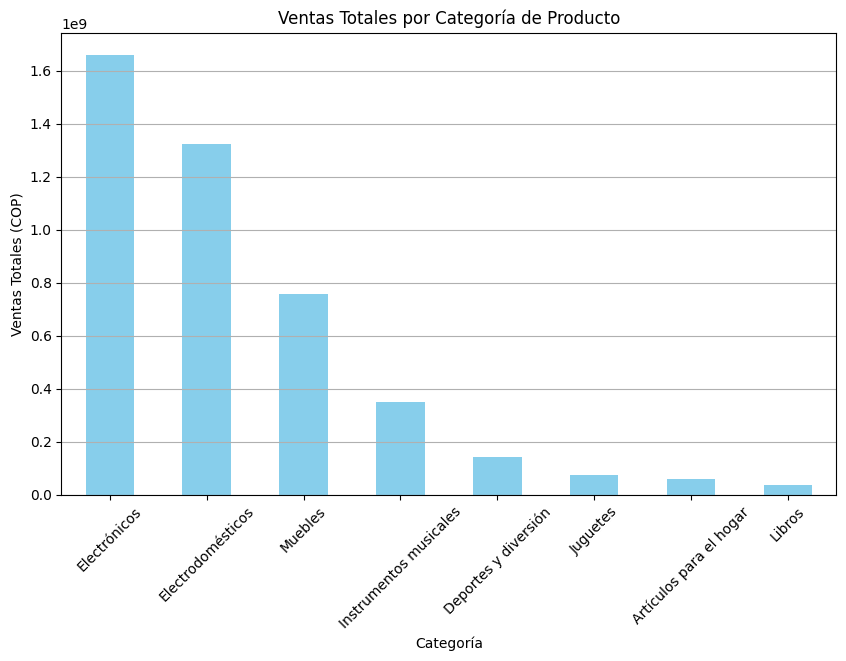

In [9]:
# Ventas por categoría de producto
ventas_por_categoria = all_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print("Ventas totales por categoría:")
print(ventas_por_categoria)

# Gráfico de ventas por categoría
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ventas_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales (COP)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Calificación promedio de la tienda


Calificación promedio general: 4.01/5

Calificación promedio por tienda:
Tienda 1: 3.98/5
Tienda 2: 4.04/5
Tienda 3: 4.05/5
Tienda 4: 4.00/5


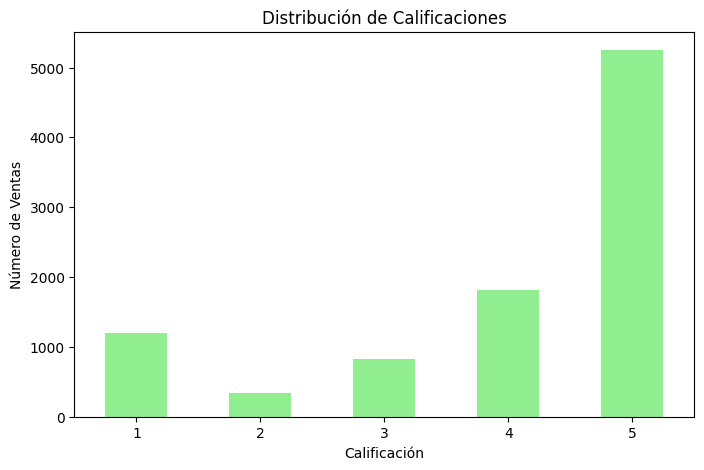

In [10]:
# Calificación promedio general
calificacion_promedio = all_tiendas['Calificación'].mean()
print(f"Calificación promedio general: {calificacion_promedio:.2f}/5")

# Calificación promedio por tienda
calificacion_por_tienda = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}
print("\nCalificación promedio por tienda:")
for tienda_n, calificacion in calificacion_por_tienda.items():
    print(f"{tienda_n}: {calificacion:.2f}/5")

# Distribución de calificaciones
distribucion_calificaciones = all_tiendas['Calificación'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
distribucion_calificaciones.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=0)
plt.show()

# 4. Productos más y menos vendidos

Top 10 productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64

Top 10 productos menos vendidos:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


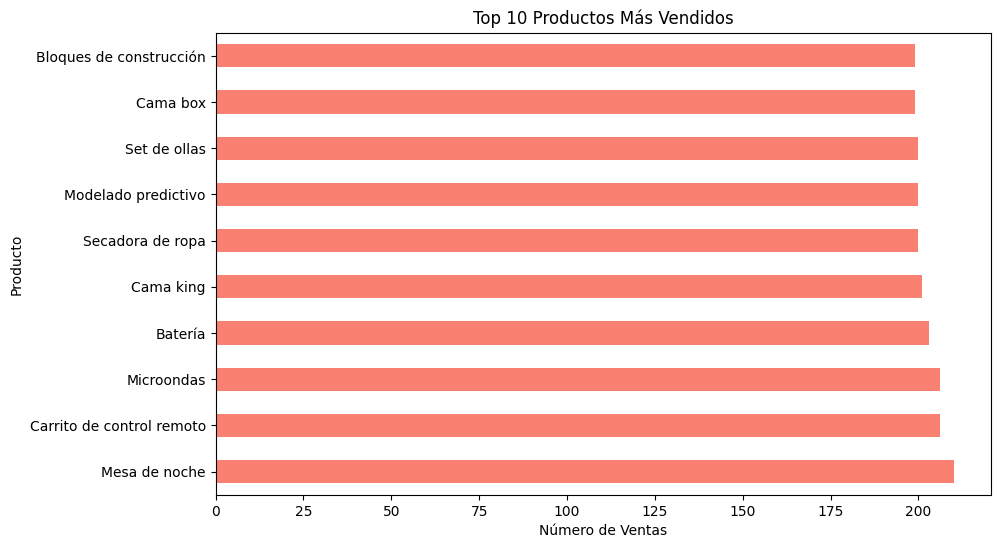

In [11]:
# Productos más vendidos (por cantidad)
productos_mas_vendidos = all_tiendas['Producto'].value_counts().head(10)
print("Top 10 productos más vendidos:")
print(productos_mas_vendidos)

# Productos menos vendidos (por cantidad)
productos_menos_vendidos = all_tiendas['Producto'].value_counts().tail(10)
print("\nTop 10 productos menos vendidos:")
print(productos_menos_vendidos)

# Gráfico de productos más vendidos
plt.figure(figsize=(10, 6))
productos_mas_vendidos.plot(kind='barh', color='salmon')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Número de Ventas')
plt.ylabel('Producto')
plt.show()

# 5. Envío promedio por tienda

Costo de envío promedio general: $24,875.15 COP

Costo de envío promedio por tienda:
Tienda 1: $26,018.61 COP
Tienda 2: $25,216.24 COP
Tienda 3: $24,805.68 COP
Tienda 4: $23,459.46 COP


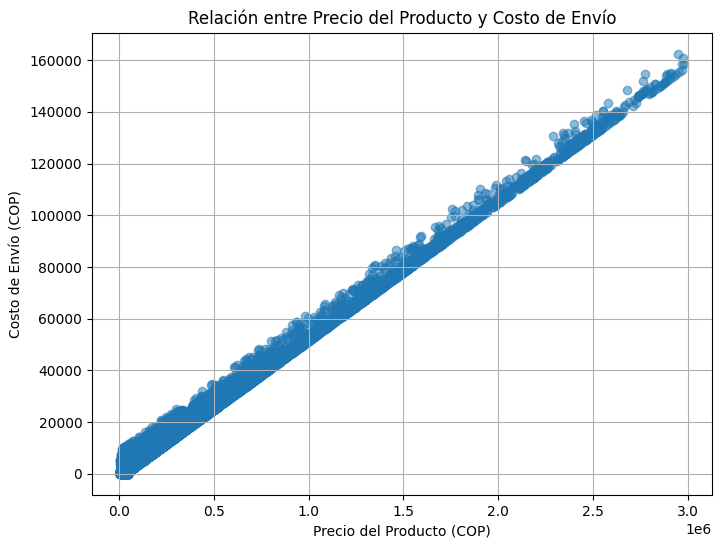

In [12]:
# Costo de envío promedio general
envio_promedio = all_tiendas['Costo de envío'].mean()
print(f"Costo de envío promedio general: ${envio_promedio:,.2f} COP")

# Envío promedio por tienda
envio_por_tienda = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}
print("\nCosto de envío promedio por tienda:")
for tienda_n, envio in envio_por_tienda.items():
    print(f"{tienda_n}: ${envio:,.2f} COP")

# Relación entre precio y costo de envío
plt.figure(figsize=(8, 6))
plt.scatter(all_tiendas['Precio'], all_tiendas['Costo de envío'], alpha=0.5)
plt.title('Relación entre Precio del Producto y Costo de Envío')
plt.xlabel('Precio del Producto (COP)')
plt.ylabel('Costo de Envío (COP)')
plt.grid(True)
plt.show()